In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings ('ignore')

## Load Dataframe

In [2]:
#load data
dataframe = pd.read_csv ('D:\Data Set\German Credit\german_credit_data.csv')

## Data Exploration

In [3]:
dataframe.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


* Terdapat feature type yang tidak sesuai ya itu feature Job.
* Feature saving account dan checking account memiliki missing value.
* Terdapat feature yang tidak digunakan, yaitu Unnamed: 0

In [5]:
print ('Unique value of Saving accounts\n', dataframe['Saving accounts'].unique())
print ('Unique value of Checking account\n', dataframe['Checking account'].unique())
print ('Unique value of Purpose\n', dataframe['Purpose'].unique())

Unique value of Saving accounts
 [nan 'little' 'quite rich' 'rich' 'moderate']
Unique value of Checking account
 ['little' 'moderate' nan 'rich']
Unique value of Purpose
 ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


Terlihat bahwa feature saving dan checking account merupakan data kategorikal bertipe ordinal. Sehingga untuk menghandlenya kita perlu menggunakan Labeling, dan missing value pada kedua feature tersebut dapat kita handle dengan mengisinya dengan **None**.

Sedangkan, Feature Purpose merupakan data kategorikal bertipe nominal. Sehingga untuk menghandlenya kita perlu menggunakan one hot encoding.

In [6]:
dataframe[['Age', 'Credit amount', 'Duration']].describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


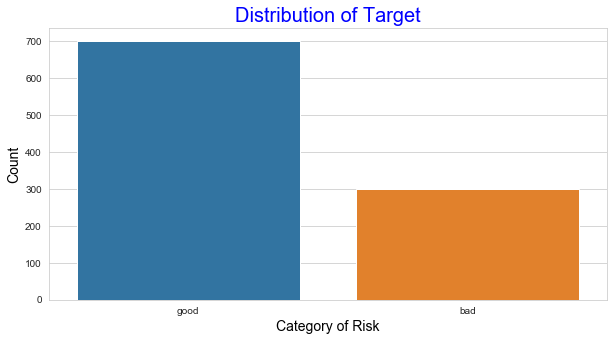

In [7]:
#Check distribution of target
sns.set_style (style = "whitegrid")

plt.figure(figsize = (10, 5))
sns.countplot(dataframe['Risk'])
plt.title('Distribution of Target', color = 'blue', loc = 'center', fontsize = 20)
plt.xlabel('Category of Risk', color = 'black', fontsize = 14)
plt.ylabel('Count', color = 'black', fontsize = 14)
plt.show()

* Terlihat bahwa distribusi dari target cukup seimbang yaitu 700:300

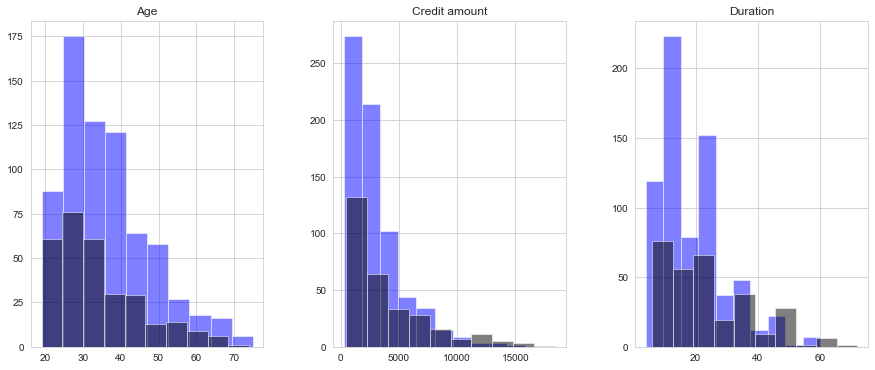

In [8]:
#Check Distribution of numeric features
numeric_features = ['Age', 'Credit amount', 'Duration']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
dataframe[numeric_features][dataframe['Risk'] == "good"].hist(bins=10, color = 'Blue', alpha=0.5, ax = ax)
dataframe[numeric_features][dataframe['Risk'] == "bad"].hist(bins=10, color = 'Black', alpha=0.5, ax = ax)
plt.show()

Feature age, credit amount dan duration tampaknya tidak ada kecenderungan apa pun terhadap Kredit Risiko pelanggan.

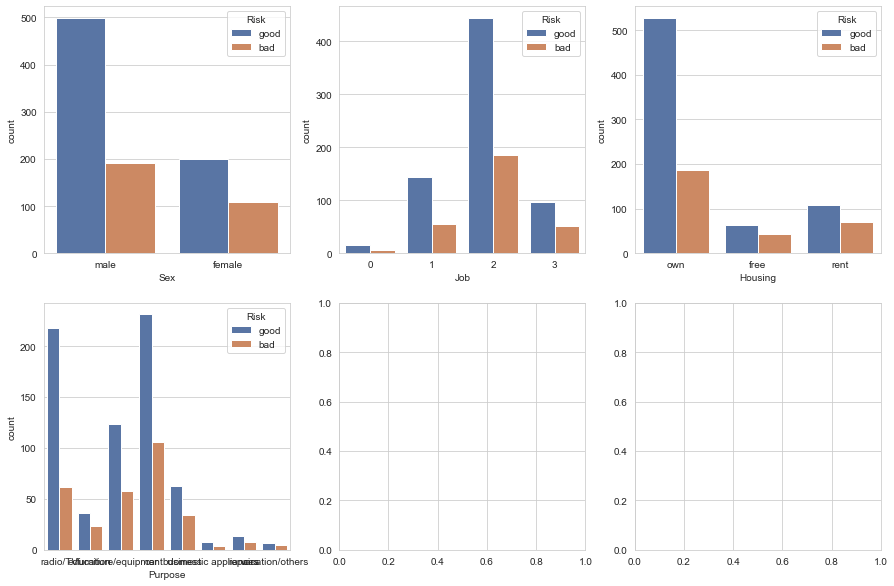

In [9]:
#Check distribution of feature
cols = ['Sex', 'Job', 'Housing', 'Purpose']

fig, axarr = plt.subplots(2, 3, figsize=(15, 10))
for i in cols:
    index = cols.index(i)
    plt.subplot(2, 3, index + 1)
    sns.countplot(x = i, data = dataframe, hue="Risk", palette = "deep")

Ada kecenderungan Bad Risk akan terjadi pada orang yang berjenis kelamin laki-laki, jenis pekerjaannya 2 orang, jenis rumah adalah rumah sendiri, dan tujuan pemberian kredit adalah untuk melunasi mobil.

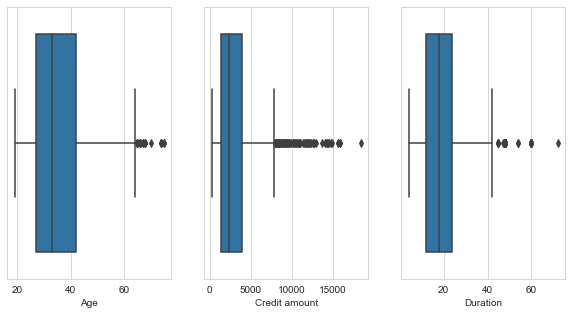

In [10]:
fig, axarr = plt.subplots(1, 3, figsize=(10, 5))
cols = ['Age', 'Credit amount', 'Duration']
for i in cols:
    index = cols.index(i)
    plt.subplot(1,3,index + 1)
    sns.boxplot(dataframe[i])

* Terlihat bahwa feature feature numerik memiliki banyak outlier.

In [11]:
## Check correlation between feature
data_numerik = dataframe[['Age', 'Credit amount', 'Duration']]
data_numerik.corr()

,Age,Credit amount,Duration
Age,1.000000,0.032716,-0.036136
Credit amount,0.032716,1.000000,0.624984
Duration,-0.036136,0.624984,1.000000


## Data Preprocessing

In [12]:
dataframe.drop('Unnamed: 0', axis = 1, inplace = True)

In [13]:
dataframe['Saving accounts'].fillna('None', inplace = True)
dataframe['Checking account'].fillna('None', inplace = True)

In [14]:
print ("Before handling ordinal type feature Saving accounts", dataframe['Saving accounts'].unique())
print ('Before handling ordinal type feature Checking accounts', dataframe['Checking account'].unique())
print ('Before handling ordinal type feature Checking accounts', dataframe['Risk'].unique())

Before handling ordinal type feature Saving accounts ['None' 'little' 'quite rich' 'rich' 'moderate']
Before handling ordinal type feature Checking accounts ['little' 'moderate' 'None' 'rich']
Before handling ordinal type feature Checking accounts ['good' 'bad']


In [15]:
le = LabelEncoder()
dataframe['Saving accounts'] = le.fit_transform(dataframe['Saving accounts'])
dataframe['Checking account'] = le.fit_transform(dataframe['Checking account'])
dataframe['Risk'] = le.fit_transform(dataframe['Risk'])

print ("After handling ordinal type feature Saving accounts", dataframe['Saving accounts'].unique())
print ('After handling ordinal type feature Checking accounts', dataframe['Checking account'].unique())
print ('After handling ordinal type feature Checking accounts', dataframe['Risk'].unique())

After handling ordinal type feature Saving accounts [0 1 3 4 2]
After handling ordinal type feature Checking accounts [1 2 0 3]
After handling ordinal type feature Checking accounts [1 0]


In [16]:
#change data type Job
dataframe['Job'] = dataframe['Job'].astype(object)

In [17]:
#Handling outlier
Q1 = (dataframe[['Age', 'Credit amount', 'Duration']]).quantile(0.25)
Q3 = (dataframe[['Age', 'Credit amount', 'Duration']]).quantile(0.75)

IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q3 - (1.5*IQR)

more_than = (dataframe[['Age', 'Credit amount', 'Duration']] > maximum)
lower_than = (dataframe[['Age', 'Credit amount', 'Duration']] < minimum)

dataframe[['Age', 'Credit amount', 'Duration']] = dataframe[['Age', 'Credit amount', 'Duration']].mask(more_than, maximum, axis=1)
dataframe[['Age', 'Credit amount', 'Duration']] = dataframe[['Age', 'Credit amount', 'Duration']].mask(lower_than, minimum, axis=1)

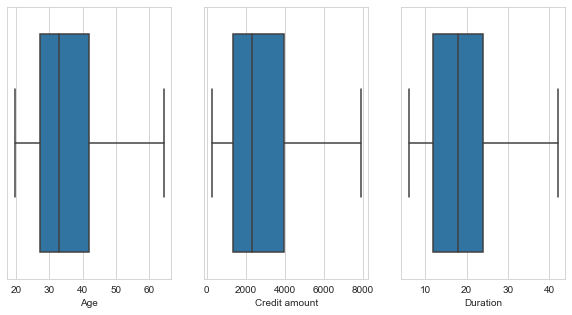

In [18]:
fig, axarr = plt.subplots(1, 3, figsize=(10, 5))
cols = ['Age', 'Credit amount', 'Duration']
for i in cols:
    index = cols.index(i)
    plt.subplot(1,3,index + 1)
    sns.boxplot(dataframe[i])

In [19]:
dataframe = pd.get_dummies(dataframe)

In [20]:
dataframe.head()

,Age,Saving accounts,Checking account,Credit amount,Duration,Risk,Sex_female,Sex_male,Job_0,Job_1,...,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,64.5,0,1,1169.0,6,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,22.0,1,2,5951.0,42,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,49.0,1,0,2096.0,12,1,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,45.0,1,1,7882.0,42,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53.0,1,1,4870.0,24,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [21]:
#Spliting
X = dataframe.drop('Risk', axis = 1)
y = dataframe['Risk']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
print ('Ukuran X train', X_train.shape)
print ('Ukuran X test', X_test.shape)
print ('Ukuran y train', y_train.shape)
print ('Ukuran y test', y_test.shape)

Ukuran X train (800, 22)
Ukuran X test (200, 22)
Ukuran y train (800,)
Ukuran y test (200,)


## Modelling

Accuracy of model based on training set 1.0
Accuracy of model based on testing set 0.64
Classification report based on training set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       559

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Classification report based on testing set
               precision    recall  f1-score   support

           0       0.39      0.41      0.40        59
           1       0.75      0.74      0.74       141

    accuracy                           0.64       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.64      0.64      0.64       200



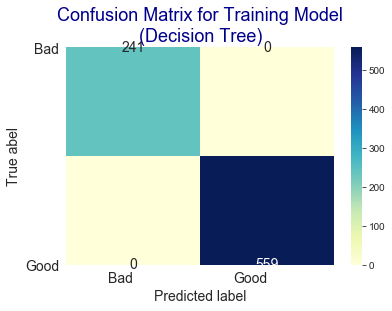

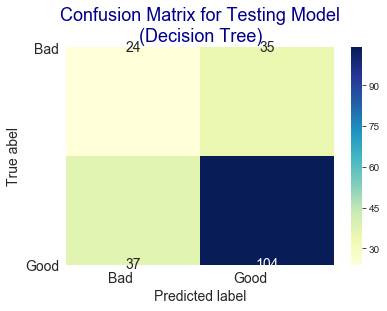

In [24]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)
y_pred_train = DecisionTree.predict(X_train)
y_pred_test = DecisionTree.predict(X_test)

print ('Accuracy of model based on training set', accuracy_score(y_train, y_pred_train))
print ('Accuracy of model based on testing set', accuracy_score(y_test, y_pred_test))

print ('Classification report based on training set\n',classification_report(y_train, y_pred_train))
print ('Classification report based on testing set\n', classification_report(y_test, y_pred_test))

# Form confusion matrix as a DataFrame
confusion_matrix_train_df = pd.DataFrame((confusion_matrix(y_train, y_pred_train)), ('Bad', 'Good'), ('Bad', 'Good'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_train_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree)', fontsize=18, color='darkblue')
plt.ylabel('True abel', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

confusion_matrix_testing_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('Bad', 'Good'), ('Bad', 'Good'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_testing_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree)', fontsize=18, color='darkblue')
plt.ylabel('True abel', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Accuracy of model based on training set 0.695
Accuracy of model based on testing set 0.645
Classification report based on training set
               precision    recall  f1-score   support

           0       0.49      0.43      0.46       241
           1       0.77      0.81      0.79       559

    accuracy                           0.69       800
   macro avg       0.63      0.62      0.62       800
weighted avg       0.68      0.69      0.69       800

Classification report based on testing set
               precision    recall  f1-score   support

           0       0.38      0.34      0.36        59
           1       0.74      0.77      0.75       141

    accuracy                           0.65       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.63      0.65      0.64       200



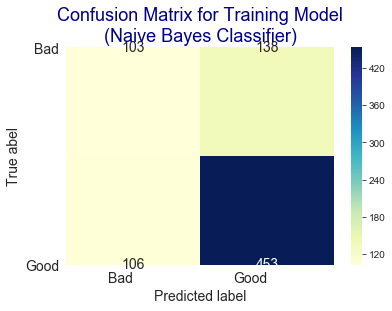

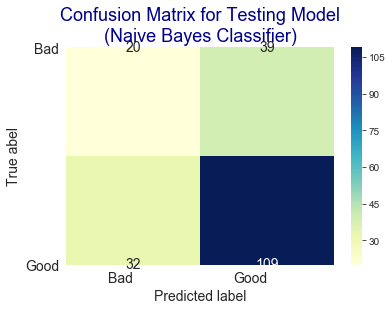

In [25]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)
y_pred_train = NaiveBayes.predict(X_train)
y_pred_test = NaiveBayes.predict(X_test)

print ('Accuracy of model based on training set', accuracy_score(y_train, y_pred_train))
print ('Accuracy of model based on testing set', accuracy_score(y_test, y_pred_test))

print ('Classification report based on training set\n', classification_report(y_train, y_pred_train))
print ('Classification report based on testing set\n', classification_report(y_test, y_pred_test))

# Form confusion matrix as a DataFrame
confusion_matrix_train_df = pd.DataFrame((confusion_matrix(y_train, y_pred_train)), ('Bad', 'Good'), ('Bad', 'Good'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_train_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Naive Bayes Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True abel', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

confusion_matrix_testing_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('Bad', 'Good'), ('Bad', 'Good'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_testing_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Naive Bayes Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True abel', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Accuracy of model based on training set 0.9875
Accuracy of model based on testing set 0.71
Classification report based on training set
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       241
           1       0.99      0.99      0.99       559

    accuracy                           0.99       800
   macro avg       0.98      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

Classification report based on testing set
               precision    recall  f1-score   support

           0       0.51      0.49      0.50        59
           1       0.79      0.80      0.80       141

    accuracy                           0.71       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.71      0.71      0.71       200



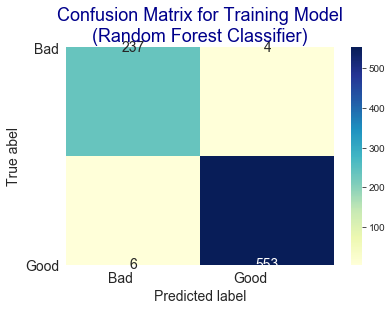

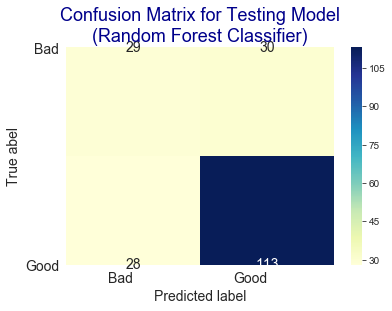

In [26]:
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)
y_pred_train = RandomForest.predict(X_train)
y_pred_test = RandomForest.predict(X_test)

print ('Accuracy of model based on training set', accuracy_score(y_train, y_pred_train))
print ('Accuracy of model based on testing set', accuracy_score(y_test, y_pred_test))

print ('Classification report based on training set\n', classification_report(y_train, y_pred_train))
print ('Classification report based on testing set\n', classification_report(y_test, y_pred_test))

# Form confusion matrix as a DataFrame
confusion_matrix_train_df = pd.DataFrame((confusion_matrix(y_train, y_pred_train)), ('Bad', 'Good'), ('Bad', 'Good'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_train_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True abel', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

confusion_matrix_testing_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('Bad', 'Good'), ('Bad', 'Good'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_testing_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True abel', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Accuracy of model based on training set 0.71125
Accuracy of model based on testing set 0.71
Classification report based on training set
               precision    recall  f1-score   support

           0       0.54      0.27      0.36       241
           1       0.74      0.90      0.81       559

    accuracy                           0.71       800
   macro avg       0.64      0.59      0.59       800
weighted avg       0.68      0.71      0.68       800

Classification report based on training set
               precision    recall  f1-score   support

           0       0.52      0.25      0.34        59
           1       0.74      0.90      0.81       141

    accuracy                           0.71       200
   macro avg       0.63      0.58      0.58       200
weighted avg       0.68      0.71      0.67       200



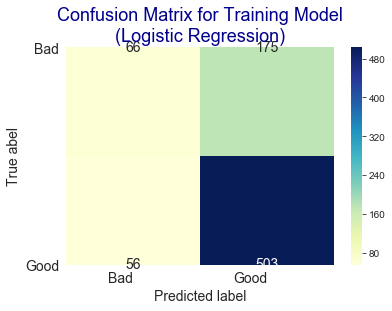

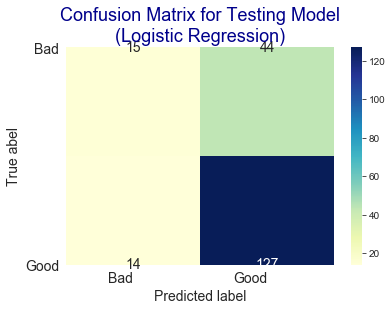

In [27]:
LogisticReg = LogisticRegression()
LogisticReg.fit(X_train, y_train)
y_pred_train = LogisticReg.predict(X_train)
y_pred_test = LogisticReg.predict(X_test)

print ('Accuracy of model based on training set', accuracy_score(y_train, y_pred_train))
print ('Accuracy of model based on testing set', accuracy_score(y_test, y_pred_test))

print ('Classification report based on training set\n', classification_report(y_train, y_pred_train))
print ('Classification report based on training set\n', classification_report(y_test, y_pred_test))

# Form confusion matrix as a DataFrame
confusion_matrix_train_df = pd.DataFrame((confusion_matrix(y_train, y_pred_train)), ('Bad', 'Good'), ('Bad', 'Good'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_train_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True abel', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

confusion_matrix_testing_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('Bad', 'Good'), ('Bad', 'Good'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_testing_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True abel', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Accuracy of model based on training set 0.75875
Accuracy of model based on testing set 0.685
Classification report based on training set
               precision    recall  f1-score   support

           0       0.64      0.45      0.53       241
           1       0.79      0.89      0.84       559

    accuracy                           0.76       800
   macro avg       0.72      0.67      0.68       800
weighted avg       0.75      0.76      0.75       800

Classification report based on testing set
               precision    recall  f1-score   support

           0       0.44      0.24      0.31        59
           1       0.73      0.87      0.80       141

    accuracy                           0.69       200
   macro avg       0.58      0.55      0.55       200
weighted avg       0.65      0.69      0.65       200



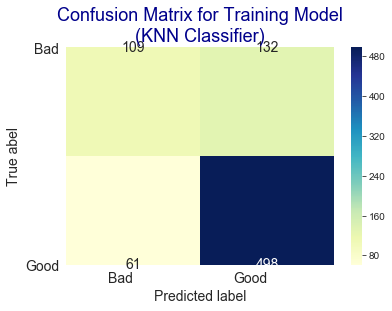

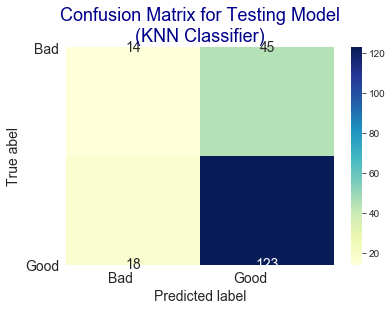

In [28]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred_train = KNN.predict(X_train)
y_pred_test = KNN.predict(X_test)

print ('Accuracy of model based on training set', accuracy_score(y_train, y_pred_train))
print ('Accuracy of model based on testing set', accuracy_score(y_test, y_pred_test))

print ('Classification report based on training set\n', classification_report(y_train, y_pred_train))
print ('Classification report based on testing set\n', classification_report(y_test, y_pred_test))

# Form confusion matrix as a DataFrame
confusion_matrix_train_df = pd.DataFrame((confusion_matrix(y_train, y_pred_train)), ('Bad', 'Good'), ('Bad', 'Good'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_train_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(KNN Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True abel', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

confusion_matrix_testing_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('Bad', 'Good'), ('Bad', 'Good'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_testing_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(KNN Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True abel', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

## Model Evaluasi
Berdasarkan pemodelan di atas, kita memilih Logistic Regression. Hal ini dikarenakan kinerja model Logistic Regression cenderung dapat diprediksi dengan baik pada tahap pelatihan dan pengujian. Di sisi lain, algoritma lain cenderung over fitting karena akurasi pada saat pelatihan dan pengujian berbanding jauh.